In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in the two files
dhs = pd.read_csv("out_two.csv")
ais = pd.read_csv("ais_dt.csv")


# DHS

In [3]:
#I want to check and see if this data has the same columns out of which I build a unique id

In [4]:
dhs.head(3)

,Contraceptive_method_currently_used.1,Age_of_wife/partner.1,Updated_Man's_weight_in_kilograms_(1_decimal),Updated_Woman's_weight_in_kilograms_(1_decimal),Age_of_household_members,Respondent's_line_number_(answering_Household_questionnaire),Wealth_index_x,Case_Identification_x,Cluster_number,Household_number,...,Age_of_most_recent_partner,Age_of_2nd_to_most_recent_partner,Age_of_3rd_to_most_recent_partner,Total_lifetime_number_of_sex_partners,Concurrent_sexual_partners,Cumulative_concurrent_sexual_partners,Weight_for_Domestic_Violence_(6_decimals),Experienced_any_severe_violence_(D105D-F)_by_wife/partner,"Experienced_any_sexual_violence_(D105H-I,K)_by_wife/partner",Gender
0,0,NaN,66.1,NaN,20,3,5,119,1,19,...,NaN,NaN,NaN,NaN,NaN,NaN,706444.0,NaN,NaN,Male
1,0,NaN,999.5,NaN,23,2,5,2 9,2,9,...,NaN,NaN,NaN,1.0,NaN,NaN,1349895.0,0.0,0.0,Male
2,0,NaN,63.0,NaN,16,2,5,247,2,47,...,NaN,NaN,NaN,1.0,NaN,NaN,643931.0,NaN,NaN,Male


In [15]:
dhs.dtypes

Contraceptive_method_currently_used.1                            int64
Age_of_wife/partner.1                                          float64
Updated_Man's_weight_in_kilograms_(1_decimal)                  float64
Updated_Woman's_weight_in_kilograms_(1_decimal)                float64
Age_of_household_members                                         int64
                                                                ...   
Cumulative_concurrent_sexual_partners                          float64
Weight_for_Domestic_Violence_(6_decimals)                      float64
Experienced_any_severe_violence_(D105D-F)_by_wife/partner      float64
Experienced_any_sexual_violence_(D105H-I,K)_by_wife/partner    float64
Gender                                                          object
Length: 108, dtype: object

In [6]:
ais.drop(columns=['Unnamed: 0'], inplace = True)

In [9]:
dhs.filter(like = 'Age').head()

,Age_of_wife/partner.1,Age_of_household_members,Age_of_wife/partner,Age_at_circumcision,Age_at_first_sex,Age_of_most_recent_partner,Age_of_2nd_to_most_recent_partner,Age_of_3rd_to_most_recent_partner
0,NaN,20,NaN,NaN,0,NaN,NaN,NaN
1,NaN,23,NaN,NaN,96,NaN,NaN,NaN
2,NaN,16,NaN,8.0,14,NaN,NaN,NaN
3,NaN,15,NaN,8.0,14,NaN,NaN,NaN
4,NaN,16,NaN,95.0,12,NaN,NaN,NaN


# AIS

In [10]:
ages = [15,16,17,18,19,20,21,22,23,24,24,25,26]

In [11]:
 ais = ais[ais['current_age'].isin(ages)]

In [12]:
ais['current_age']

1        18
3        19
4        22
5        21
9        18
         ..
21731    26
21735    24
21736    22
21737    22
21739    15
Name: current_age, Length: 9518, dtype: int64

In [13]:
ais.head(3)

,caseid,country_code_and_phase,cluster_number,household_number,respondent_line_number,utlimate_area_unit,month_of_birth,year_of_birth,current_age,region,...,ever_forced_for_sex,hiv_test_results,number_of_testing_times,ever_test_as_couple,careful_about_hiv,chances_getting_hiv,who_can_give_u_hiv,respondent_circumised,ever_paid_for_sex,paid_for_sex_last_12months
1,00102 02,UG6,1,2,2,1,2,1993,18,east central,...,NaN,NaN,NaN,NaN,more careful,low,boy/girlfriend,no,NaN,no
3,00103 02,UG6,1,3,2,1,4,1992,19,east central,...,no,NaN,NaN,NaN,more careful,low,boy/girlfriend,no,NaN,NaN
4,00104 01,UG6,1,4,1,1,12,1988,22,east central,...,no,NaN,NaN,NaN,more careful,high,spouse,yes,NaN,no


In [14]:
ais.dtypes

caseid                         object
country_code_and_phase         object
cluster_number                  int64
household_number                int64
respondent_line_number          int64
                               ...   
chances_getting_hiv            object
who_can_give_u_hiv             object
respondent_circumised          object
ever_paid_for_sex             float64
paid_for_sex_last_12months     object
Length: 81, dtype: object

In [13]:
#I need to change cluster number, household_number, respondent_line to floating point

In [16]:
ais['cluster_number'] = ais['cluster_number'].astype('float64')
ais['household_number'] = ais['household_number'].astype('float64')
ais['respondent_line_number'] = ais['respondent_line_number'].astype('float64')

### Let's now merge the data

We are going to consider the following columns: **`Cluser Number` + `Household Number` + `Household Line Number`** as we merge, these are the columns that create a new id.

In [18]:
 ais_dhs = pd.merge(dhs, ais, left_on=['Cluster_number','Household_number',"Respondent's_line_number_(answering_Household_questionnaire)"], right_on=['cluster_number','household_number','respondent_line_number'], how = 'left')

In [19]:
ais_dhs.shape

(1886, 189)

In [21]:
ais_dhs.to_csv('left_two_data.csv',index = False)

In [22]:
ais_dhs.shape

(1886, 189)

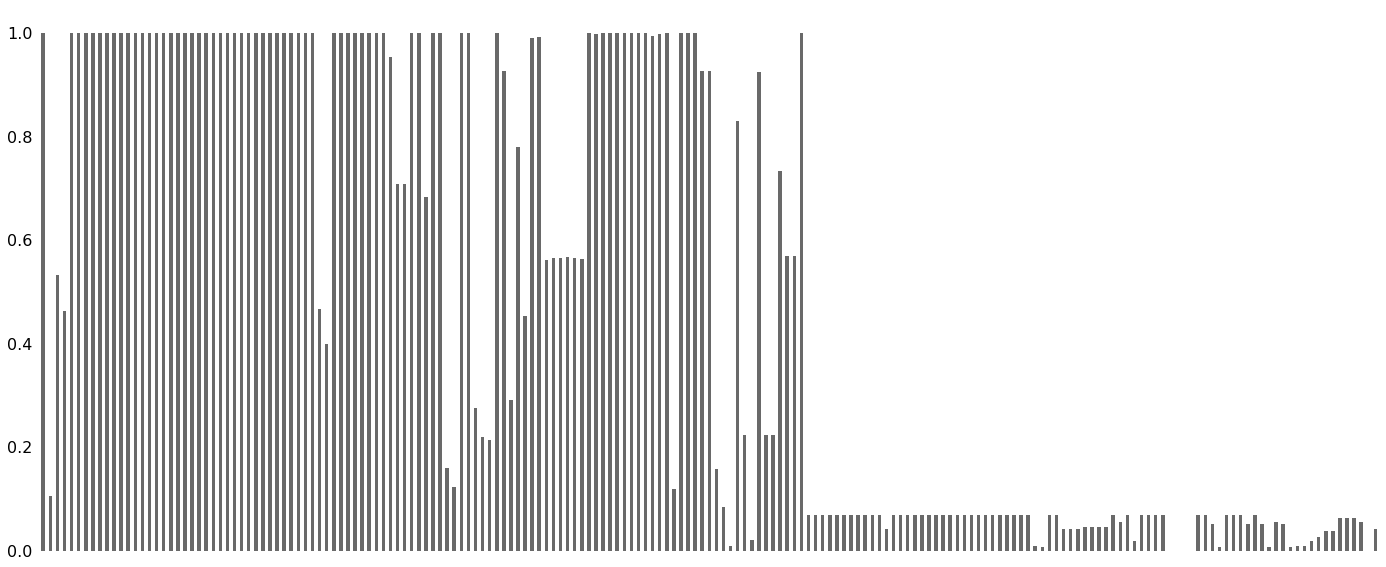

In [20]:
mno.bar(ais_dhs)

In [28]:
ais.shape, dhs.shape

((9518, 81), (861, 209))

In [29]:
ais.filter(like ='age')

,current_age,age_of_household_head,age_at_first_cohabitation,age_at_first_sex
1,18,28,NaN,14
3,19,45,NaN,16
4,22,22,21.0,14
5,21,22,20.0,14
9,18,75,14.0,at first union
...,...,...,...,...
21731,26,25,20.0,13
21735,24,29,23.0,20
21736,22,29,21.0,12
21737,22,31,20.0,17


In [31]:
ais_dhs['current_age'].value_counts()

25.0    20
24.0     7
22.0     6
18.0     6
23.0     5
26.0     5
16.0     2
17.0     2
20.0     2
19.0     1
21.0     1
Name: current_age, dtype: int64